Tarea S8.01. Visualizaciones en Python

Realiza la conexión en Python con MySQL Workbench para cargar toda la información que tienes en las tablas.

Realizarás una visualización para cada ejercicio. Comenta lo que llama la atención de graficar esta variable, justifica la elección del gráfico e interpreta los resultados en función de tus datos.

In [58]:
# El primer paso va a ser importar la conexion de python para MySQL.
import mysql.connector # Importamos la liberia para usar MySQL
import pandas as pd # Importamos Pandas para hacer las consultas en DataFrames, limpieza de datos y mas
import matplotlib.pyplot as plt # Importamos la libreria de matplotlib para las visualizaciones y nos permitira mas precision de los mismo
import seaborn as sns # Importamos la librearia seaborn muy fuerte en tomar decisiones de optimizacion de las visualizaciones


# Hacemos la conexion a MySQL:

conexion = mysql.connector.connect( 
    user='root',
    password='Lucho100',
    database='transactions_2'
)
# Una vez conectados comprobamos

print(conexion)

# Aqui procedemos a realizar las SELECT que vamos a utilizar para nuestras visualizaciones. Utilzando Pandas para leer las consultas
# Relacionadas con la base de datos en la que estamos conectando. Llamando a las tablas y sus columnas.

company = pd.read_sql("SELECT * FROM company", conexion)
credit_card = pd.read_sql("SELECT * FROM credit_card", conexion)
products = pd.read_sql("SELECT * FROM products", conexion)
transactions = pd.read_sql("SELECT * From transaction", conexion)
user = pd.read_sql("SELECT * FROM user", conexion)
transactions_user = pd.read_sql("SELECT sum(t.declined) AS Declinadas, u.country AS Pais FROM transaction AS t JOIN  user AS u ON t.user_id = u.id GROUP BY Pais", conexion)

C:\Users\Luciano\AppData\Local\Temp\ipykernel_1040\2576074553.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  company = pd.read_sql("SELECT * FROM company", conexion)
C:\Users\Luciano\AppData\Local\Temp\ipykernel_1040\2576074553.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  credit_card = pd.read_sql("SELECT * FROM credit_card", conexion)
C:\Users\Luciano\AppData\Local\Temp\ipykernel_1040\2576074553.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  products = pd.read_sql("SELECT * FROM products", conexion)
C:\

In [59]:
# Aqui veremos como estan compuestos los datos de cada tabla, y ver si los datos corresponden a la informacion que se le atribuye.


print(products.info())
print("\n")
print(company.info())
print("\n")
print(products.info())
print("\n")
print(transactions.info())
print("\n")
print(user.info())
print("\n")
print(transactions_user.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            100 non-null    int64  
 1   product_name  100 non-null    object 
 2   price         100 non-null    float64
 3   colour        100 non-null    object 
 4   weight        100 non-null    float64
 5   warehouse_id  100 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.8+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            100 non-null    object
 1   company_name  100 non-null    object
 2   phone         100 non-null    object
 3   email         100 non-null    object
 4   country       100 non-null    object
 5   website       100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB
None


In [78]:
# Actualizamos birth_date de object a fecha y comprobamos

user["birth_date"]=pd.to_datetime(user["birth_date"], format='%b %d, %Y')

print(user.info())

transactions['longitude'] = pd.to_numeric(transactions['longitude'], errors='coerce')


# Finalmente concluimos y pasamos a realizar los ejercicios

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           275 non-null    int64         
 1   name         275 non-null    object        
 2   surname      275 non-null    object        
 3   phone        275 non-null    object        
 4   email        275 non-null    object        
 5   birth_date   275 non-null    datetime64[ns]
 6   country      275 non-null    object        
 7   city         275 non-null    object        
 8   postal_code  275 non-null    object        
 9   address      275 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 21.6+ KB
None


Nivel 1

- Ejercicio 1
Una variable numérica.

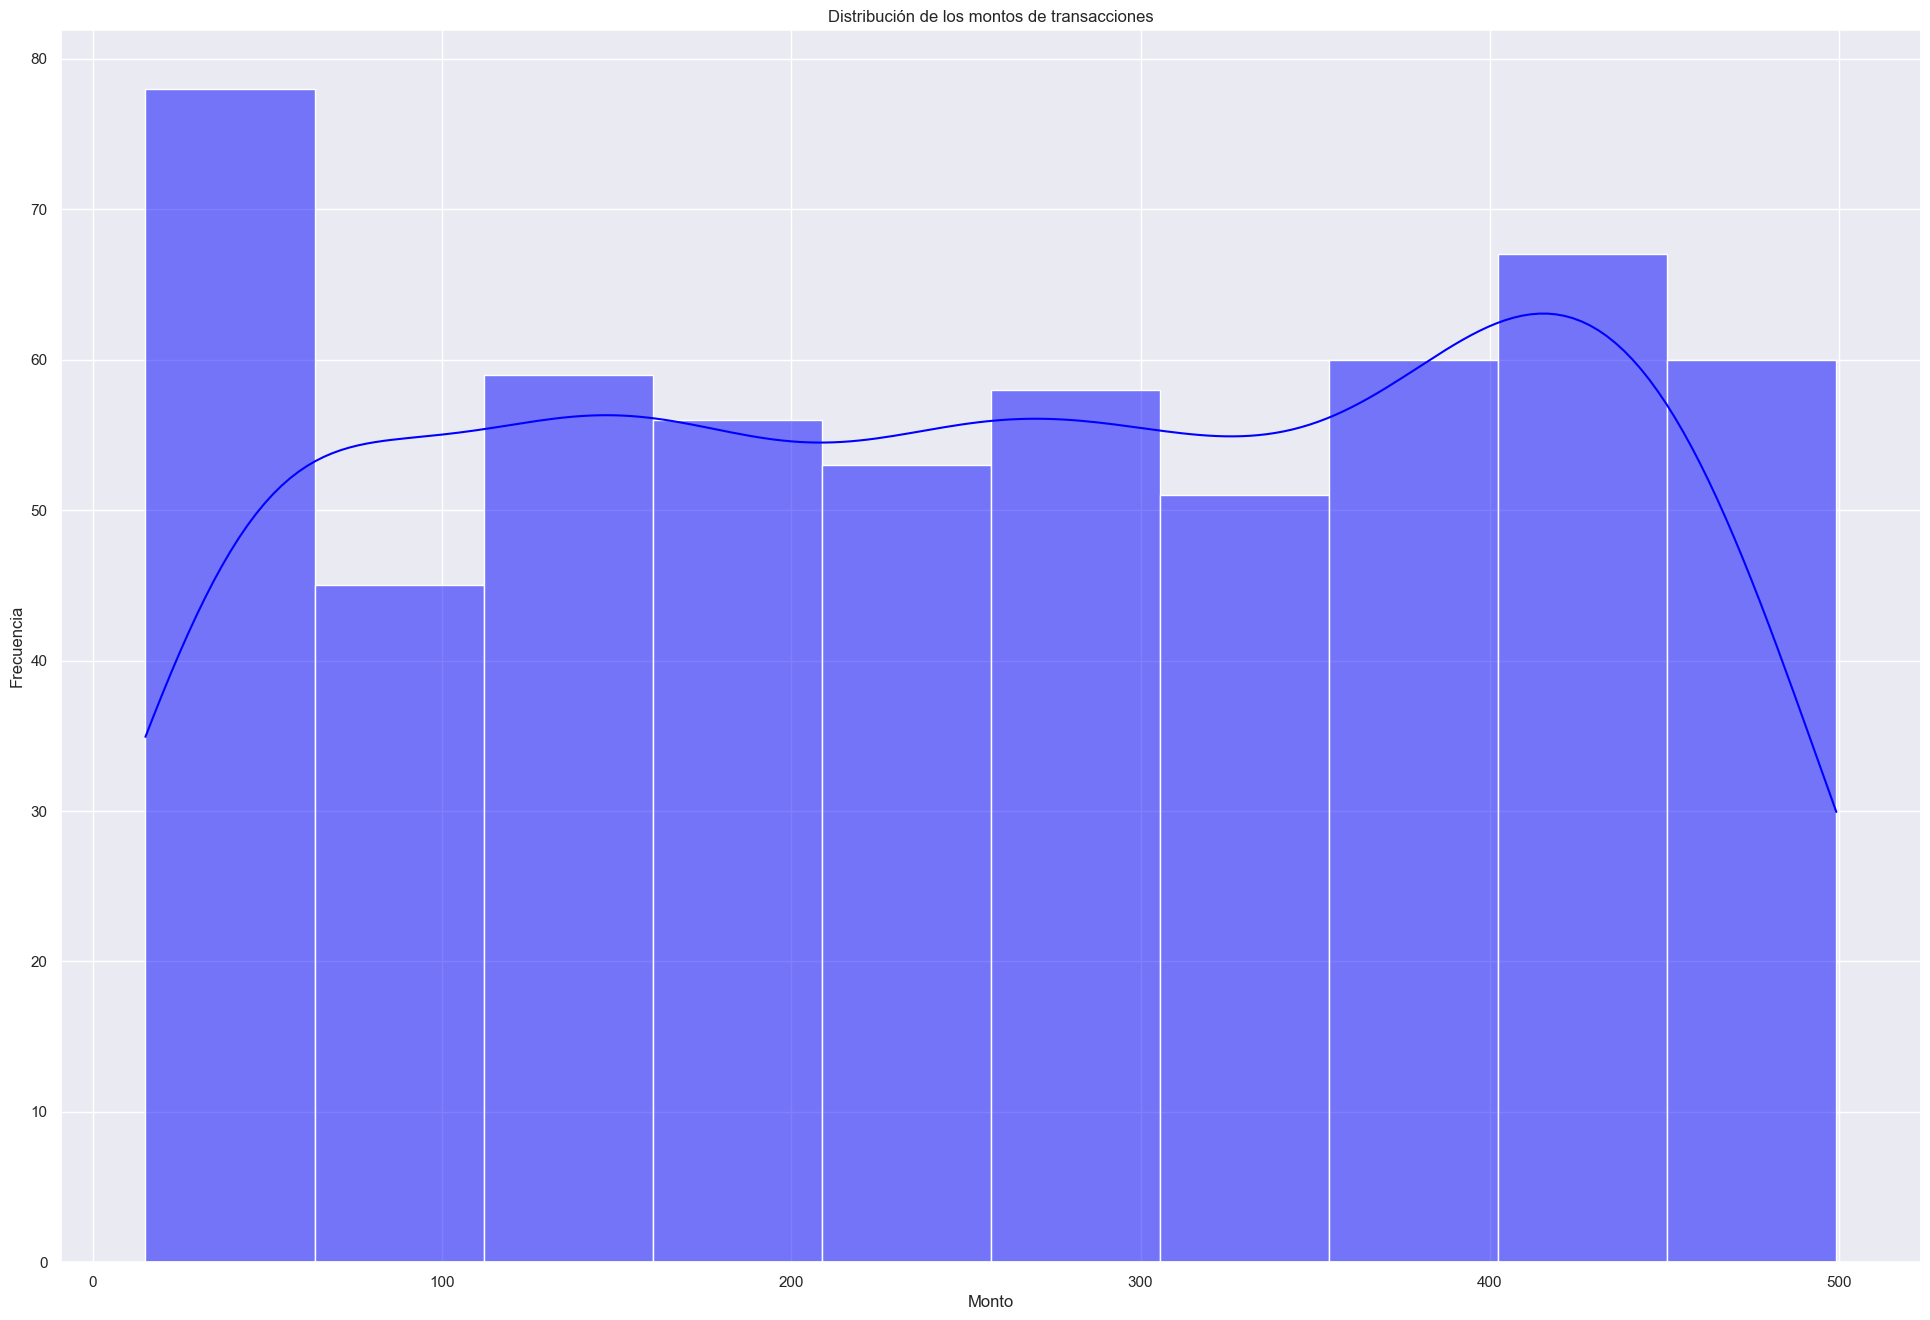

In [61]:

# Histograma del monto de las transacciones

plt.figure(figsize=(24, 16))
sns.histplot(transactions['amount'], kde=True, bins=10, color='blue')
plt.title('Distribución de los montos de transacciones')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')

plt.show()


El histograma muestra la distribución de los precios, ayudando a identificar rangos comunes, valores extremos, y dispersión.

En este caso podemos observar que los rangos de $0 a $50 en los productos es donde mas ventas hay y tambien en el rango entre $400 y $450.

Aunque la visualizacion nos muestra que la distribucion es dentro de todo equitativa.
Siempre nos interesara ganar mas en este caso. 

Por eso es importante saber donde es que esta el caudal mayor de ganancia y por eso creo en la importancia de aumentar la frecuencia en los productos de mayor monto y profundizar en el rango de los productos entre $350 y $450 haciendo las campañas de marketing especializadas en las regiones adecuadas.

- Ejercicio 2
Dos variables numéricas.

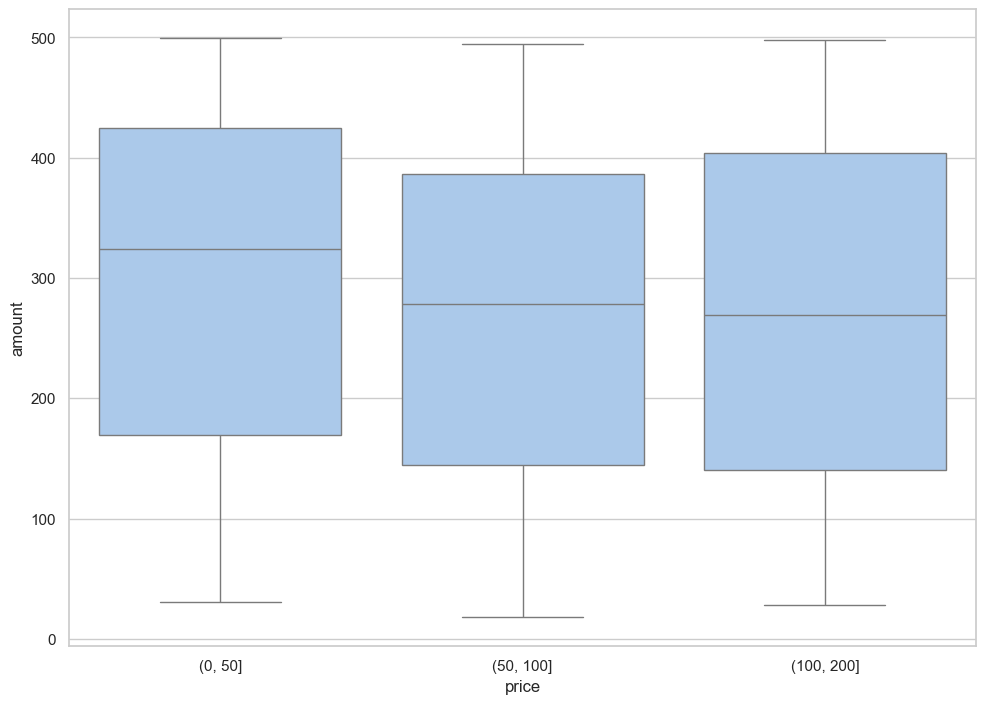

In [74]:
# Boxplot de dos variables numericas
price_bins = pd.cut(products['price'], bins=[0, 50, 100, 200])
sns.boxplot(x=price_bins, y=transactions['amount'])
plt.show()

En este grafico de boxplot se puede observar que la mediana y los rangos de los montos de transaccion son similares en los tres intervalos de precios.

Esto podria indicar que el precio del producto no influye significativamente en el monto total de la transaccion.

Habria que analizar si los intervamos mas amplios o los mas especificos del precio del producto revelan patrones.




- Ejercicio 3
Una variable categórica.

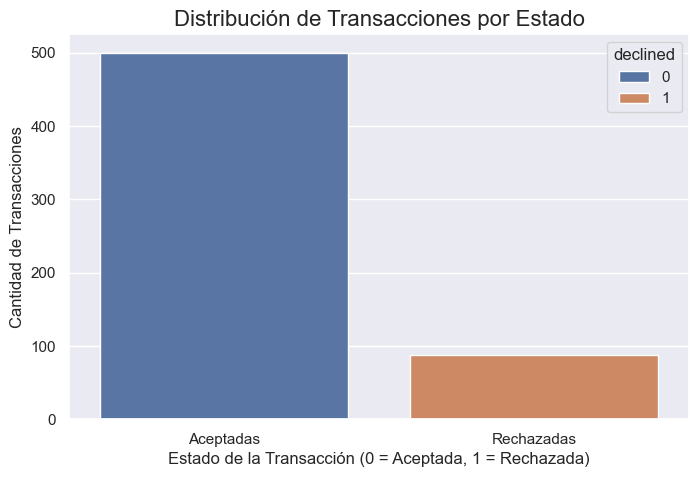

In [63]:
# Grafico de barras para el estado de las transacciones (rechazadas o aceptadas)
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
plt.figure(figsize=(8, 5))
sns.countplot(x=transactions['declined'], hue=transactions['declined'])
plt.title('Distribución de Transacciones por Estado', fontsize=16)
plt.xlabel('Estado de la Transacción (0 = Aceptada, 1 = Rechazada)', fontsize=12)
plt.ylabel('Cantidad de Transacciones', fontsize=12)
plt.xticks([0, 1], labels=['Aceptadas', 'Rechazadas'])
plt.show()


Aqui en esta visualizacion de barras podemos observar las transacciones declinadas y no declinadas, que nos ayudaran a entender cuantas fueron aceptadas y cuales fueron rechazadas.

En este caso contamos con 500 transacciones aceptadas. Y por el otro lado casi llegamos a 100 transacciones rechazadas.

Hay que implementar mejoras o validaciones adicionales para reducir el porcentaje de transacciones declinadas.

En mas profundidad, podremos observar que estas las transacciones declinadas tienen una particularidad que investigare en la proxima visualizacion.

- Ejercicio 4
Una variable categórica y una numérica.

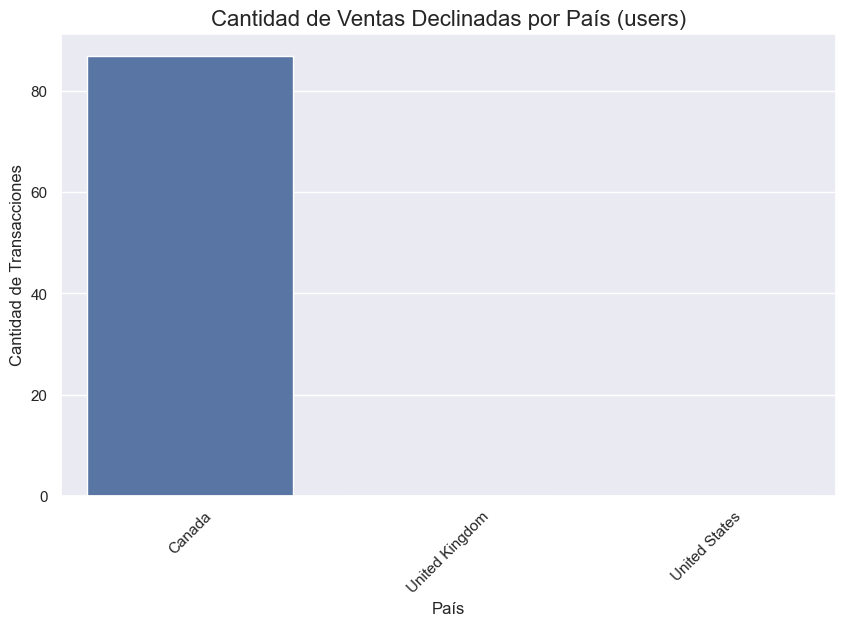

In [64]:
# Grafico de barras con la cantidad de Ventas Declinadas en users
cantidad_declinadas = transactions_user.groupby('Pais')['Declinadas'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Pais', y='Declinadas', data=cantidad_declinadas)
plt.title('Cantidad de Ventas Declinadas por País (users)', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Cantidad de Transacciones', fontsize=12)
plt.xticks(rotation=45)
plt.show()


Entrando en profundiad la cantidad de transacciones declinadas que teniamos, encontramos de que en nuestros usuarios todas las transacciones declinadas se encontraban en nuestra sede en Canada.

Por lo que da a entender que son los que tuvieron problemas con las transacciones.

Esto indica que debemos focalizar especificamente en que Canada baje las transacciones declinadas, y que necesita refuerzos con los bancos. Por eso enviaran a los abogados a revisar este tema en particular.

- Ejercicio 5
Dos variables categóricas.

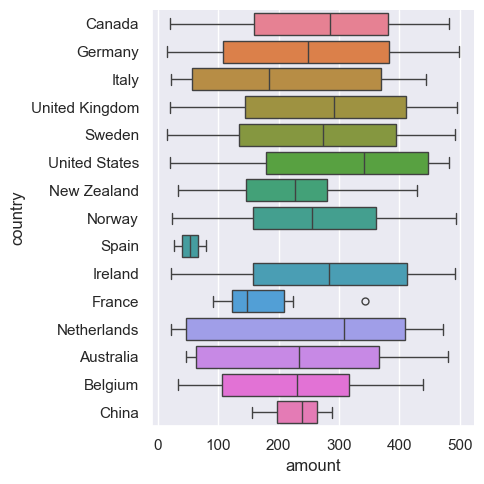

In [65]:
# Transacciones Declinadas por país
import seaborn as sns

transactions_company = pd.merge(transactions, company, left_on='company_id', right_on='id')

sns.catplot(data=transactions_company,
            x='amount',
            y='country',
            hue='country',
            kind='box'
            )




En esta visualizacion podremos ver la distribucion del amount en transacciones para los diferentes paises.
Paises como Estados Unidos, Canada y Alemania tienen distribuciones mas amplias. ¿Que significa esto? que los montos de transaccion varian considerablemente.

Y por otro lado tenemos paises como España y China que tienen distribuciones mas pequeñas, o sea menor variabilidad. Aunque tambien pequeños montos pequeñas transacciones.

Los paises con los montos medianos son Australia, Belgica, y Reino unido.
Francia y Suecia tienen transacciones fuera de los bigotes, lo que indica posibles valores extremos.

Si se quiere mejorar el desempeño en paises con montos bajos, como España y China se debera explorar estrategias para incrementar las ventas promedio.

- Ejercicio 6
Tres variables.

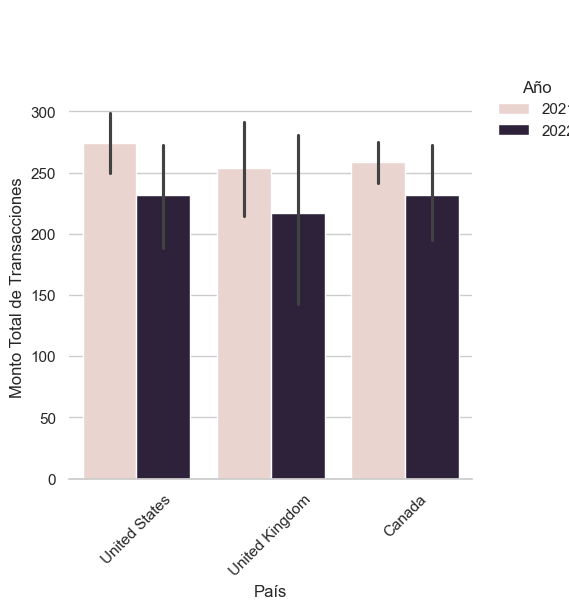

In [81]:
transactions_usuarios = pd.merge(transactions,user,left_on='user_id', right_on='id')

transactions_usuarios['year'] = transactions['timestamp'].dt.year


# Configuracion de estilo global para Seaborn
sns.set_theme(style="whitegrid", palette="pastel")

# Crear el catplot 
g = sns.catplot(
    data=transactions_usuarios,
    kind='bar',
    x='country',
    y='amount',
    hue='year'
 
)

g.set_axis_labels("País", "Monto Total de Transacciones", fontsize=12) 
g.set_titles("Distribución del Monto por País y Año")  
g.set_xticklabels(rotation=45)  

g._legend.set_title("Año")
g._legend.set_bbox_to_anchor((1, 1)) 


sns.despine(left=True) 
plt.subplots_adjust(top=0.9)
plt.show()



En esta visualizacion de catplot podemos observar a nuestro equipos de ventas, que se dividen en 3 paises(eje X).
Y luego el monto(eje Y) de cada uno de ellos. La diferencia entre los años 2021 y 2022.

A simple vista veremos de que hay una similitud entre ellas, y que en los 3 equipos se ha desmejorado en comparacion al año anterior.

Estados Unidos demuestra tener los picos mas altos en ventas mientras que Canada mas bajos y teniendo en cuenta que ademas es lider en transacciones declinadas, demostrando este sector que habra que profundizar y mejorar su desempeño.

A su vez Reino Unido ha desmejorado notablemente en el 2022 siendo la peor hasta el momento con picos muy bajos (-150).





- Ejercicio 7

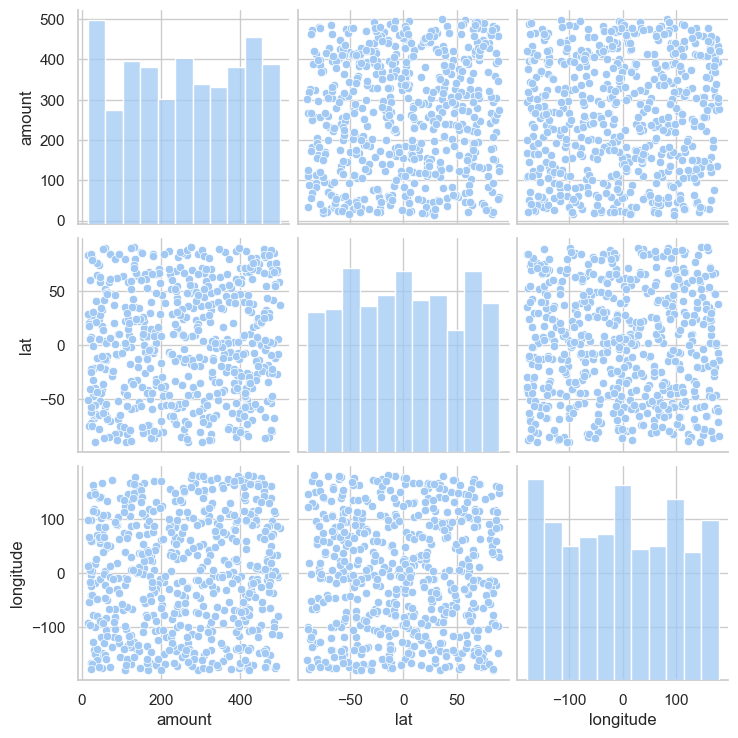

In [79]:
# Pairplot entre variables numéricas
sns.pairplot(transactions[['amount','lat','longitude']])
plt.show()

